In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score          #精确性分数

In [2]:
data = load_breast_cancer()#乳腺癌数据集
X = data.data
y = data.target

In [3]:
X.data.shape#(569, 30)

(569, 30)

In [5]:
#实例化模型对象 
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
 
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)

In [6]:
#逻辑回归的重要属性coef_，查看每个特征所对应的参数
lrl1 = lrl1.fit(X,y)          #训练模型
lrl1.coef_                    #查看每个特征对应的权重参数

array([[ 3.98655539,  0.03168826, -0.13519939, -0.01620732,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50409089,  0.        , -0.07129426,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24544991, -0.1283736 , -0.01441933,  0.        ,
         0.        , -2.05584159,  0.        ,  0.        ,  0.        ]])

In [7]:
(lrl1.coef_ != 0).sum(axis=1)           #array([10])    30个特征中有10个特征的系数不为0，所以“l1惩罚可以产生稀疏项，常用于特征选择”

array([10])

In [8]:
lrl2 = lrl2.fit(X,y)
lrl2.coef_

array([[ 1.60721590e+00,  1.01219645e-01,  5.79033964e-02,
        -5.11038440e-03, -9.81270571e-02, -2.99121394e-01,
        -4.59913969e-01, -2.28589273e-01, -1.41311851e-01,
        -1.90095344e-02,  9.95555146e-03,  8.71644082e-01,
         1.01056252e-01, -9.28550813e-02, -1.04588324e-02,
        -1.73615663e-02, -5.22240893e-02, -2.76297727e-02,
        -2.82837199e-02,  1.19673029e-03,  1.20502895e+00,
        -2.99380012e-01, -1.71640114e-01, -2.16750837e-02,
        -1.80922044e-01, -8.63517338e-01, -1.16048555e+00,
        -4.39392688e-01, -4.36270724e-01, -8.54042632e-02]])

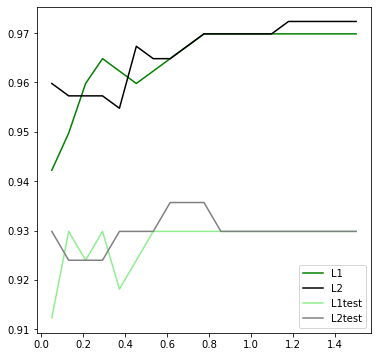

In [9]:
#观察不同的C值对模型的accuracy_score的影响
l1 = []
l2 = []
l1test = []
l2test = []
 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
 
for i in np.linspace(0.05,1.5,19):
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    
    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
 
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]    
 
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1.5,19),graph[i],color[i],label=label[i])
plt.legend(loc=4)              #图例的位置在哪里?4表示，右下角
plt.show()


In [10]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel     #嵌入法进行特征选择

In [11]:
data = load_breast_cancer()
data.data.shape

(569, 30)

In [12]:
LR_ = LR(solver="liblinear",C=0.9,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9490601503759398

In [13]:
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)

In [14]:
X_embedded.shape  #(569, 9)，会发现经过嵌入法进行特征选择后，从30个特征中选择了9个特征，减少了特征的数量

(569, 9)

In [15]:
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()#0.9368323826808401，虽然降低了，但差异不大

0.9368107769423559

(0.0, 30)
(0.10780558138183385, 17)
(0.2156111627636677, 12)
(0.3234167441455016, 11)
(0.4312223255273354, 8)
(0.5390279069091692, 8)
(0.6468334882910032, 6)
(0.754639069672837, 5)
(0.8624446510546708, 5)
(0.9702502324365047, 5)
(1.0780558138183385, 5)
(1.1858613952001724, 4)
(1.2936669765820064, 2)
(1.40147255796384, 2)
(1.509278139345674, 2)
(1.6170837207275077, 1)
(1.7248893021093417, 1)
(1.8326948834911756, 1)
(1.9405004648730093, 1)
(2.0483060462548432, 1)


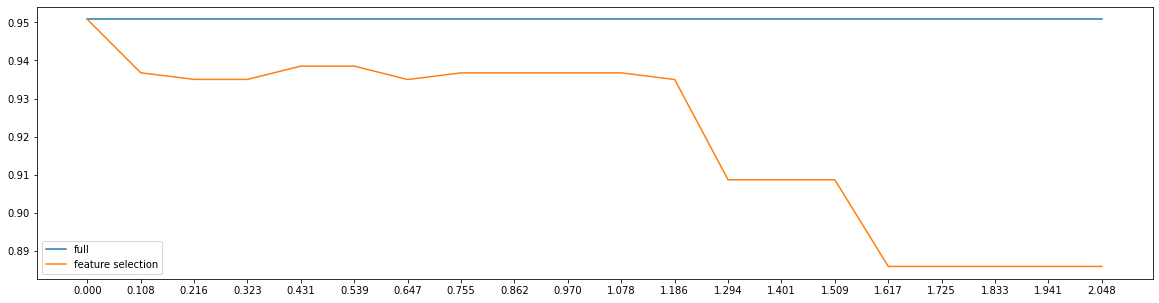

In [16]:
fullx = []
fsx = []
 
threshold = np.linspace(0,abs((LR_.fit(data.data,data.target).coef_)).max(),20)
 
k=0
for i in threshold:
    X_embedded = SelectFromModel(LR_,threshold=i).fit_transform(data.data,data.target)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=5).mean())
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=5).mean())
    print((threshold[k],X_embedded.shape[1]))
    k+=1
    
plt.figure(figsize=(20,5))
plt.plot(threshold,fullx,label="full")
plt.plot(threshold,fsx,label="feature selection")
plt.xticks(threshold)
plt.legend()
plt.show()

0.9561090225563911 6.01


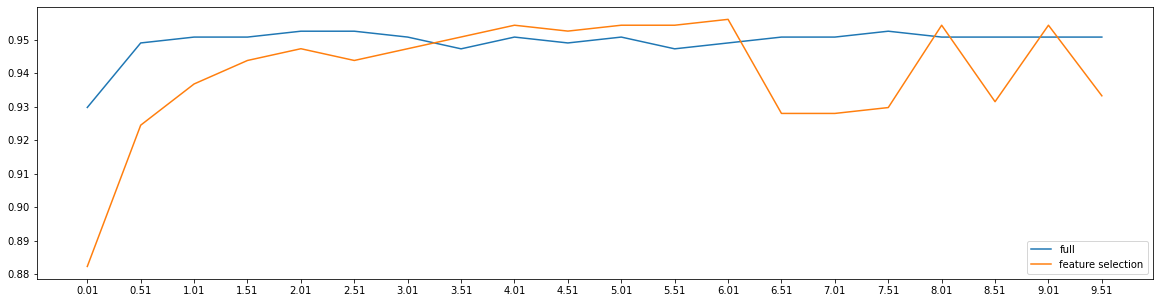

In [17]:
#使用全部特征与使用嵌入法进行特征选择后的特征，不同的C值对模型的影响
fullx = []
fsx = []
 
C=np.arange(0.01,10.01,0.5)
 
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
    
print(max(fsx),C[fsx.index(max(fsx))])
 
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()


0.9561090225563911 6.0649999999999995


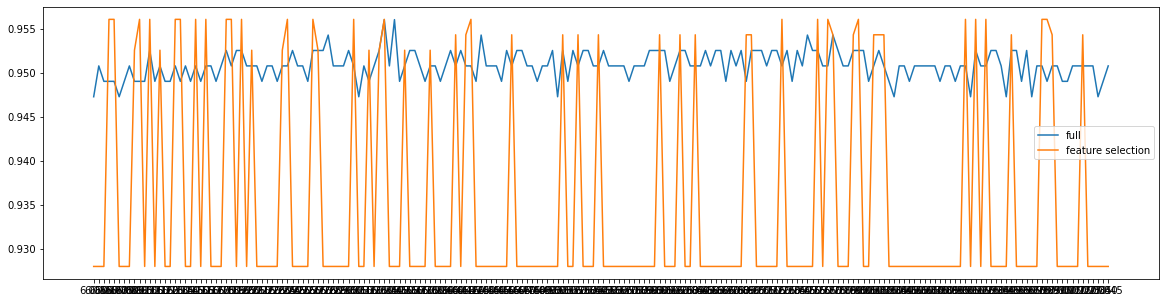

In [18]:
# 进一步缩小C值的范围
fullx = []
fsx = []
 
C=np.arange(6.05,7.05,0.005)
 
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
    
print(max(fsx),C[fsx.index(max(fsx))])
 
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

In [19]:
#验证模型效果：降维之前
LR_ = LR(solver="liblinear",C=6.0649999999999995,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean() 

0.9490601503759398

In [20]:
#验证模型效果：降维之后
LR_ = LR(solver="liblinear",C=6.0649999999999995,random_state=420)
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.9561090225563911

In [21]:
X_embedded.shape

(569, 11)

h:\ai\aienv\pytorch1x\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
h:\ai\aienv\pytorch1x\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
h:\ai\aienv\pytorch1x\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


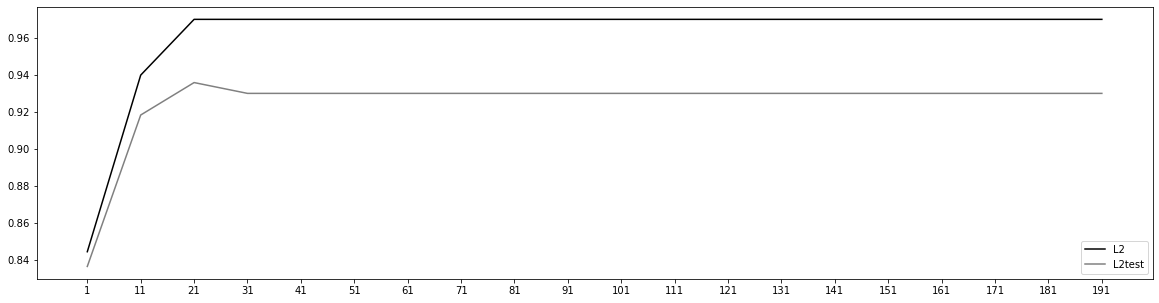

In [22]:
#最大迭代次数对模型的影响
l2 = []
l2test = []
 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
 
for i in np.arange(1,201,10):
    lrl2 = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=i)
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
    
graph = [l2,l2test]
color = ["black","gray"]
label = ["L2","L2test"]
    
plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()

In [23]:
#可以使用属性.n_iter_来调用本次求解中真正实现的迭代次数
 
lr = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=300).fit(Xtrain,Ytrain)
lr.n_iter_#array([24], dtype=int32)  只迭代了24次就达到收敛

array([24], dtype=int32)

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target        #三分类数据集

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
for multi_class in ('multinomial', 'ovr'):
    clf = LR(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(iris.data, iris.target)
 
#打印两种multi_class模式下的训练分数
#%的用法，用%来代替打印的字符串中，想由变量替换的部分。%.3f表示，保留三位小数的浮点数。%s表示，字符串。
#字符串后的%后使用元祖来容纳变量，字符串中有几个%，元祖中就需要有几个变量
 
    print("training score : %.3f (%s)" % (clf.score(iris.data, iris.target), multi_class))

training score : 0.987 (multinomial)
training score : 0.960 (ovr)


h:\ai\aienv\pytorch1x\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
h:\ai\aienv\pytorch1x\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
h:\ai\aienv\pytorch1x\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
h:\ai\aienv\pytorch1x\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
